In [1]:
#Importing needed libraries
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
#Getting the feature matrix and target vector from breast cancer data set.
X, y = load_breast_cancer(return_X_y = True)

In [3]:
#Creating a matrix with first 3 columns only
matrix = X[:, :3]

No handles with labels found to put in legend.


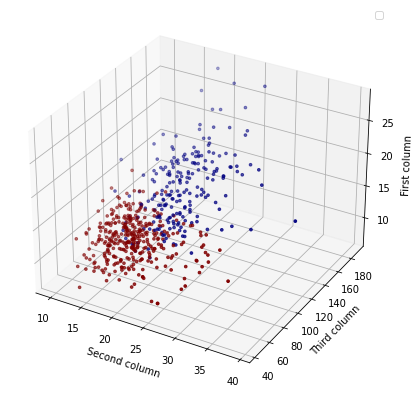

In [4]:
#Plotting the first 3 numerical columns of the data set and target column in 3d scatter plot
fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection = '3d')
ax.scatter(matrix[:, 1], matrix[:, 2], matrix[:, 0], s = 7, c = y, cmap = 'jet')
ax.set_xlabel ('Second column')
ax.set_ylabel ('Third column')
ax.set_zlabel ('First column')
ax.legend()
plt.show()

In [5]:
class myPCA:
    def __init__(self, n_components: int = 2, method : str = 'svd') -> None:
        '''
            The constructor of the PCA algorithm.
        :param n_compoents : int, default = 2
            The dimension in which the data will be reduced.
        :param method: str, default sud
            The way used by PCA to reduce the dimensionality of the data.
        '''
        
        self.__n_components = n_components
        if method in ('svd', 'eigen'):
            self.__method = method
        else:
            raise ValueError (f" '{method}' isn't a method implemented in this model")
    def fit(self, X: 'np. array'):
        '''
            The fitting method.
        param X: np.array
            The data on which we want to fit the pca
        '''
        if self.__method == 'svd':
            U, S, V = np.linalg.svd(X)
            self.__V = V[: self.__n_components, :]
        elif self.__method == 'eigen':
            corr_mat = np.corrcoef(X.T)
            # Getting the eigen vectors and eigenvalues
            self.eig_vals, self.eig_vecs = np.linalg.eig(corr_mat)
            
            # Sorting the list of tuples (eigenvalue, eigenvector)
            self.eig_pairs = [(np.abs(self.eig_vals[i]), self. eig_vecs [:, i])
                                for i in range(len(self.eig_vals ))]
            self.eig_pairs.sort(key = lambda x: x[0], reverse = True)
            
            # Calculating the explainet ration
            total = sum(self.eig_vals )
            self.explained_variance_ratio = [(i/total)* 100
                                for i in sorted(self.eig_vals, reverse= True)]
            self.cumulative_variance_ratio = np.cumsum(self.explained_variance_ratio)
            
            # Creating the projection matrix
            self.matrix_w = np.hstack(
                (self. eig_pairs[i][1].reshape(np.size (X, 1),1)
                for i in range( self.__n_components))
            )
            return self
    def transform (self , X: 'np. array') -> 'np. array':
        '''
            The transform function.
        :param X: np.array
            The data that we must reduce.
        '''
    
        if self.__method == 'svd':
            return X.dot(self.__V.T)
        elif self.__method == 'eigen':
            return X.dot (self.matrix_w)

In [6]:
#Applying standard scaler on our data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
#Instantiating a PCA object with eigenvector algorithm
pca_eig = myPCA(method = 'eigen')

In [8]:
#Fitting fuction on X matrix with the features
pca_eig.fit(X)
#Transforming the data into a new reduced matrix pca_x 
X_eig = pca_eig.transform(X)

c:\users\pulbe\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


In [9]:
#Instantiating a PCA object with svd algorithm
pca_svd = myPCA(method = 'svd')

In [10]:
#Fitting fuction on X matrix with the features
pca_svd.fit(X)
#Transforming the data into a new reduced matrix pca_x 
X_svd = pca_svd.transform(X)

In [11]:
#Reducing to 2 dimensions
pca_sklearn = PCA(n_components = 2)

In [12]:
#Fit method
pca_sklearn.fit(X)
#Transforming the data with transform method
X_sklearn = pca_sklearn.transform(X)

In [13]:
#Getting x and y values from transformed data with eigenvector algorithm
x_1 = [i[0] for i in X_eig]
y_1 = [i[1] for i in X_eig]

In [14]:
#Getting x and y values from transformed data with svd algorithm
x_2 = [i[0] for i in X_svd]
y_2 = [i[1] for i in X_svd]

In [15]:
#Getting x and y values from transformed data with sklearn PCA algorithm
x_3 = [i[0] for i in X_sklearn]
y_3 = [i[1] for i in X_sklearn]

Text(0.5, 1.0, 'Sklearn algorithm')

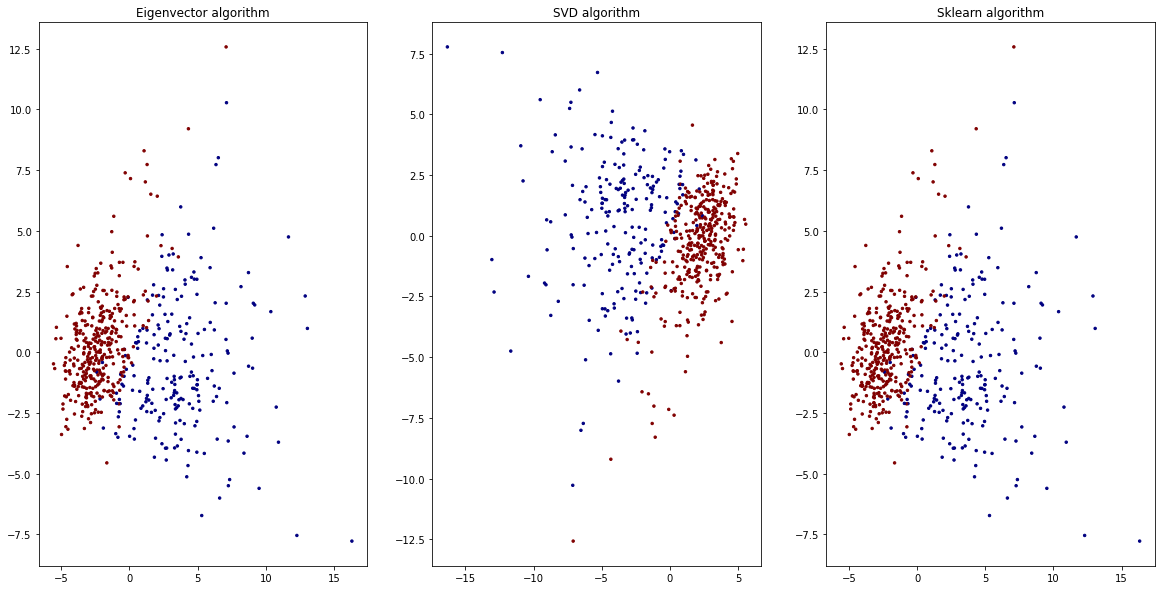

In [16]:
#Subplotting our results
fig, (ax1, ax2, ax3) = plt.subplots( 1, 3 )
ax1.scatter(x_1, y_1, s = 6, c = y, cmap = 'jet')
ax2.scatter(x_2, y_2, s = 6, c = y, cmap = 'jet')
ax3.scatter(x_3, y_3, s = 6, c = y, cmap = 'jet')

fig.set_figheight(10)
fig.set_figwidth(20)
ax1.set_title('Eigenvector algorithm')
ax2.set_title('SVD algorithm')
ax3.set_title('Sklearn algorithm')

#### The first 3 components of our dataset contribute the most on the total variation in our dataset
#### The SVD algorithm computes mirrored results compared to eigenvector and sklearn algorithm

In [17]:
#Reducing to 1 dimension
pca_sklearn_1 = PCA(n_components = 1)

In [18]:
#Fit method
pca_sklearn_1.fit(X)
#Transforming the data with transform method
X_sklearn_1 = pca_sklearn_1.transform(X)

In [19]:
#Explained variance ratio
pca_sklearn_1.explained_variance_ratio_

array([0.44272026])

In [20]:
pca_sklearn.explained_variance_ratio_

array([0.44272026, 0.18971182])

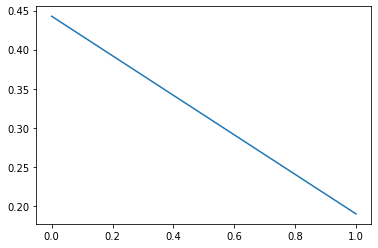

In [21]:
#Line plot of explained variance ratio
plt.plot(range(0,2), pca_sklearn.explained_variance_ratio_)
plt.show()

# Subtask 2

In [22]:
#Getting the feature matrix and target vector from digits data set.
X, y = load_digits(return_X_y = True)

In [23]:
#Loading digits dataset
digits = load_digits()

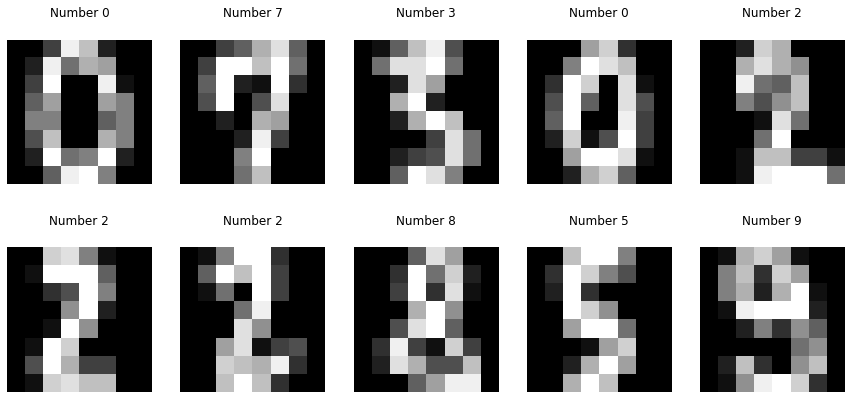

In [24]:
#Plotting 10 random digits in a 2x5 plot
plt.subplots( 2, 5, figsize = (15,7) )
plt.gray()
for ax in range(1, 11):
    ax = plt.subplot(2,5,ax)
    i = random.randrange(1797)
    ax.matshow(digits.images[i])
    ax.set_title('Number ' + str(digits.target[i]))
    plt.axis('off')
plt.show()

In [25]:
#Applying standard scaler on our data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [26]:
#Reducing to 2 dimensions
pca = PCA(n_components = 2)

In [27]:
#Fit method
pca.fit(X)
#Transforming the data with transform method
pca_X = pca.transform(X)

In [28]:
#Getting our x and y values from transformed data
x1 = [i[0] for i in pca_X]
y1 = [i[1] for i in pca_X]

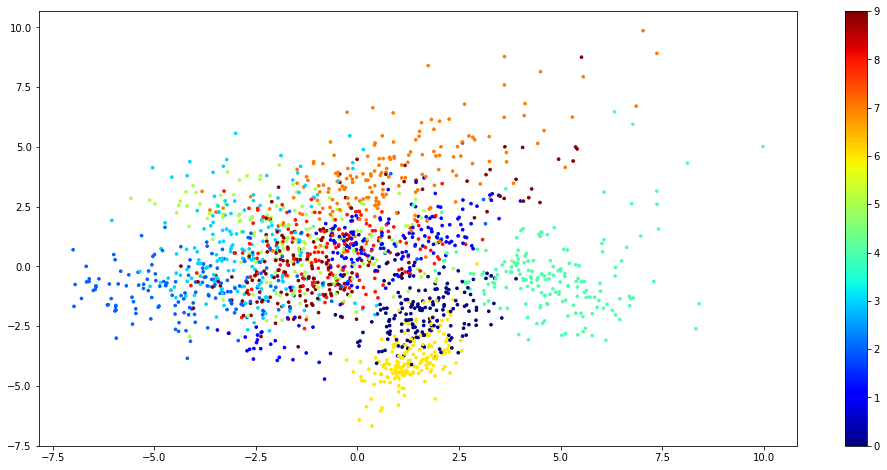

In [29]:
#Plotting the new result dataset in a scatter plot
plt.figure(figsize=(17, 8))
plt.scatter(x1, y1, s = 7, c = y, cmap = 'jet')
plt.colorbar()
plt.show()